# QCTO - Workplace Module

### Project Title: Vegetable Prices 
#### Done By: Lutho Ntsepe
#### Github_repository_link : https://github.com/Lutho135/Vegetable---Prices
### Trello board : https://trello.com/b/2ZTdqphx/vegetable-prices

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

# Introduction

Explore this extensive dataset offering a detailed analysis of vegetable prices across different regions. Collected from an authorized source (https://agmarknet.gov.in/), this dataset provides a valuable resource for researchers, analysts, and enthusiasts interested in understanding the dynamics of vegetable pricing trends. The dataset includes information on a wide range of vegetables, detailing prices over time.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from scipy.stats import norm
from sklearn import utils
plt.style.use("bmh")
plt.style.use("ggplot")

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

The dataset was retrieved from kaggle.com and the dataset consists of a collection of prices of 10 different vegetables. The prices are all numeric data and there are no blank values.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [2]:
#Please use code cells to code in and do not forget to comment your code.
data = pd.read_csv('./prices.csv')
data.head()

Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [4]:
# Create a copy of our dataframe, we are preserving the data in the original dataframe.
df_copy = data.copy()

# Convert the 'Price Dates' column to datetime format so that it is no longer an object data type
df_copy['Price Dates'] = pd.to_datetime(df_copy['Price Dates'], format = '%d-%m-%Y')

In [5]:
"""
Ensure consistent data types for all variables 

We have 
    Bhindi (Ladies finger)
    Onion and
    Green Chilli
with inconsistent data types for some cases in these variables
    
""" 

df_copy['Bhindi (Ladies finger)'] = df_copy['Bhindi (Ladies finger)'].astype('int64')
df_copy['Onion'] = df_copy['Onion'].astype('int64')
df_copy['Green Chilli'] = df_copy['Green Chilli'].astype('int64')

In [6]:
missing_values = df_copy.isnull().sum()
print(missing_values)

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64


In [7]:
# Identify duplicate rows
duplicates = df_copy.duplicated()
print("Duplicate Rows:\n", df_copy[duplicates])

Duplicate Rows:
 Empty DataFrame
Columns: [Price Dates, Bhindi (Ladies finger), Tomato, Onion, Potato, Brinjal, Garlic, Peas, Methi, Green Chilli, Elephant Yam (Suran)]
Index: []


As per observation, There are no missing values in our columns and no duplicated rows in our data. If there were missing values in our columns, we would set a default value for those missing values. see example below

The following is how we would handle columns with missing values

In [8]:
# If Tomato column had missing values
tomato_mean = df_copy['Tomato'].mean()
df_copy['Tomato'] = df_copy['Tomato'].fillna(value=tomato_mean)

The following is how we would filter data in our data frame

In [9]:
filter_condition = (df_copy['Brinjal'] > 30)
df_copy[filter_condition]

Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
9    2023-01-22                      45      16     18      22       40   
10   2023-01-23                      42      16     18      22       50   
11   2023-01-24                      45      16     16      22       60   
12   2023-01-25                      40      16     16      20       70   
13   2023-01-27                      35      16     17      17       50   
..          ...                     ...     ...    ...     ...      ...   
282  2023-12-27                      45      16     30      20       70   
283  2023-12-28                      45      16     30      20       70   
284  2023-12-29                      45      16     30      22       80   
285  2023-12-31                      45      16     26      20       60   
286  2024-01-01                      45      16      9      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  
9        65    25      9            40                    35  
10       65    25      8            40                    35  
11       65    28     15            35                    30  
12       65    25     15            35                    25  
13       65    25     15            35                    25  
..      ...   ...    ...           ...                   ...  
282     260    40     16            40                    25  
283     260    30     20            45                    25  
284     260    30     18            50                    25  
285     250    40     16            50                    40  
286     260    40     15            60                    25  

[103 rows x 11 columns]

In [10]:
df_copy.describe()

Price Dates  Bhindi (Ladies finger)      Tomato  \
count                            287              287.000000  287.000000   
mean   2023-07-04 21:54:33.867595776               29.379791   16.006969   
min              2023-01-01 00:00:00               17.000000   16.000000   
25%              2023-04-06 12:00:00               22.000000   16.000000   
50%              2023-07-04 00:00:00               27.000000   16.000000   
75%              2023-10-01 12:00:00               33.000000   16.000000   
max              2024-01-01 00:00:00               60.000000   18.000000   
std                              NaN                8.137284    0.118056   

            Onion      Potato     Brinjal      Garlic        Peas  \
count  287.000000  287.000000  287.000000  287.000000  287.000000   
mean    20.637631   18.585366   31.655052  133.101045   66.658537   
min      8.000000   12.000000   14.000000   50.000000   22.000000   
25%     12.000000   16.000000   25.000000   85.000000   40.000000   
50%     16.000000   20.000000   30.000000  120.000000   60.000000   
75%     25.000000   20.000000   35.000000  165.000000   80.000000   
max     57.000000   24.000000   80.000000  290.000000  150.000000   
std     11.722358    2.726238   11.725421   60.078331   33.302415   

             Methi  Green Chilli  Elephant Yam (Suran)  
count   287.000000    287.000000            287.000000  
mean     20.383275     44.121951             28.797909  
min       5.000000      0.000000             12.000000  
25%       8.000000     35.000000             25.000000  
50%      12.000000     40.000000             30.000000  
75%      16.000000     50.000000             30.000000  
max    2000.000000     90.000000             50.000000  
std     117.428417     12.798155              6.607973

In [11]:
df_copy.shape

(287, 11)

In [19]:
df_copy['Price Dates'] = pd.to_datetime(df_copy['Price Dates'], format = '%d-%m-%Y')
print(df_copy.dtypes)

Price Dates               datetime64[ns]
Bhindi (Ladies finger)             int64
Tomato                             int64
Onion                              int64
Potato                             int64
Brinjal                            int64
Garlic                             int64
Peas                               int64
Methi                              int64
Green Chilli                       int64
Elephant Yam (Suran)               int64
Year                               int32
Month                              int32
dtype: object


In [17]:
# Get the unique price_dates
unique_price_dates = df_copy['Price Dates'].unique()

# Count the number of unique price_dates
num_unique_price_dates = len(unique_price_dates)
print(num_unique_price_dates)

287


In [14]:


# Create a new column with just the year
df_copy['Year'] = df_copy['Price Dates'].dt.year

In [16]:
# Create a new column with just the month
df_copy['Month'] = df_copy['Price Dates'].dt.month

In [20]:
df_copy

Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
0    2023-01-01                      35      18     22      20       30   
1    2023-01-02                      35      16     22      20       30   
2    2023-01-03                      35      16     21      20       30   
3    2023-01-04                      30      16     21      22       25   
4    2023-01-08                      35      16     20      21       25   
..          ...                     ...     ...    ...     ...      ...   
282  2023-12-27                      45      16     30      20       70   
283  2023-12-28                      45      16     30      20       70   
284  2023-12-29                      45      16     30      22       80   
285  2023-12-31                      45      16     26      20       60   
286  2024-01-01                      45      16      9      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  Year  Month  
0        50    25      8            45                    25  2023      1  
1        55    25      7            40                    25  2023      1  
2        55    25      7            40                    25  2023      1  
3        55    25      7            40                    25  2023      1  
4        55    22      6            35                    25  2023      1  
..      ...   ...    ...           ...                   ...   ...    ...  
282     260    40     16            40                    25  2023     12  
283     260    30     20            45                    25  2023     12  
284     260    30     18            50                    25  2023     12  
285     250    40     16            50                    40  2023     12  
286     260    40     15            60                    25  2024      1  

[287 rows x 13 columns]

In [21]:

unique_years = df_copy['Year'].unique()

# Count the number of unique price_dates
num_unique_years = len(unique_years)
print(num_unique_years)
print(unique_years)

2
[2023 2024]


In [22]:
unique_months = df_copy['Month'].unique()

# Count the number of unique price_dates
num_unique_months = len(unique_months)
print(num_unique_months)
print(unique_months)

12
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [24]:
import calendar
# Convert month numbers to month names
df_copy['Month Names'] = df_copy['Month'].apply(lambda x: calendar.month_name[x])

# Print the DataFrame to see the updated column
print(df_copy)

    Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
0    2023-01-01                      35      18     22      20       30   
1    2023-01-02                      35      16     22      20       30   
2    2023-01-03                      35      16     21      20       30   
3    2023-01-04                      30      16     21      22       25   
4    2023-01-08                      35      16     20      21       25   
..          ...                     ...     ...    ...     ...      ...   
282  2023-12-27                      45      16     30      20       70   
283  2023-12-28                      45      16     30      20       70   
284  2023-12-29                      45      16     30      22       80   
285  2023-12-31                      45      16     26      20       60   
286  2024-01-01                      45      16      9      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  Year  Month  \
0        50    25     

In [26]:
unique_month_nam = df_copy['Month Names'].unique()
print(unique_month_nam)


['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [27]:
df_copy.drop(columns= ['Month'],inplace = True)
df_copy

Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
0    2023-01-01                      35      18     22      20       30   
1    2023-01-02                      35      16     22      20       30   
2    2023-01-03                      35      16     21      20       30   
3    2023-01-04                      30      16     21      22       25   
4    2023-01-08                      35      16     20      21       25   
..          ...                     ...     ...    ...     ...      ...   
282  2023-12-27                      45      16     30      20       70   
283  2023-12-28                      45      16     30      20       70   
284  2023-12-29                      45      16     30      22       80   
285  2023-12-31                      45      16     26      20       60   
286  2024-01-01                      45      16      9      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  Year Month Names  
0        50    25      8            45                    25  2023     January  
1        55    25      7            40                    25  2023     January  
2        55    25      7            40                    25  2023     January  
3        55    25      7            40                    25  2023     January  
4        55    22      6            35                    25  2023     January  
..      ...   ...    ...           ...                   ...   ...         ...  
282     260    40     16            40                    25  2023    December  
283     260    30     20            45                    25  2023    December  
284     260    30     18            50                    25  2023    December  
285     250    40     16            50                    40  2023    December  
286     260    40     15            60                    25  2024     January  

[287 rows x 13 columns]

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


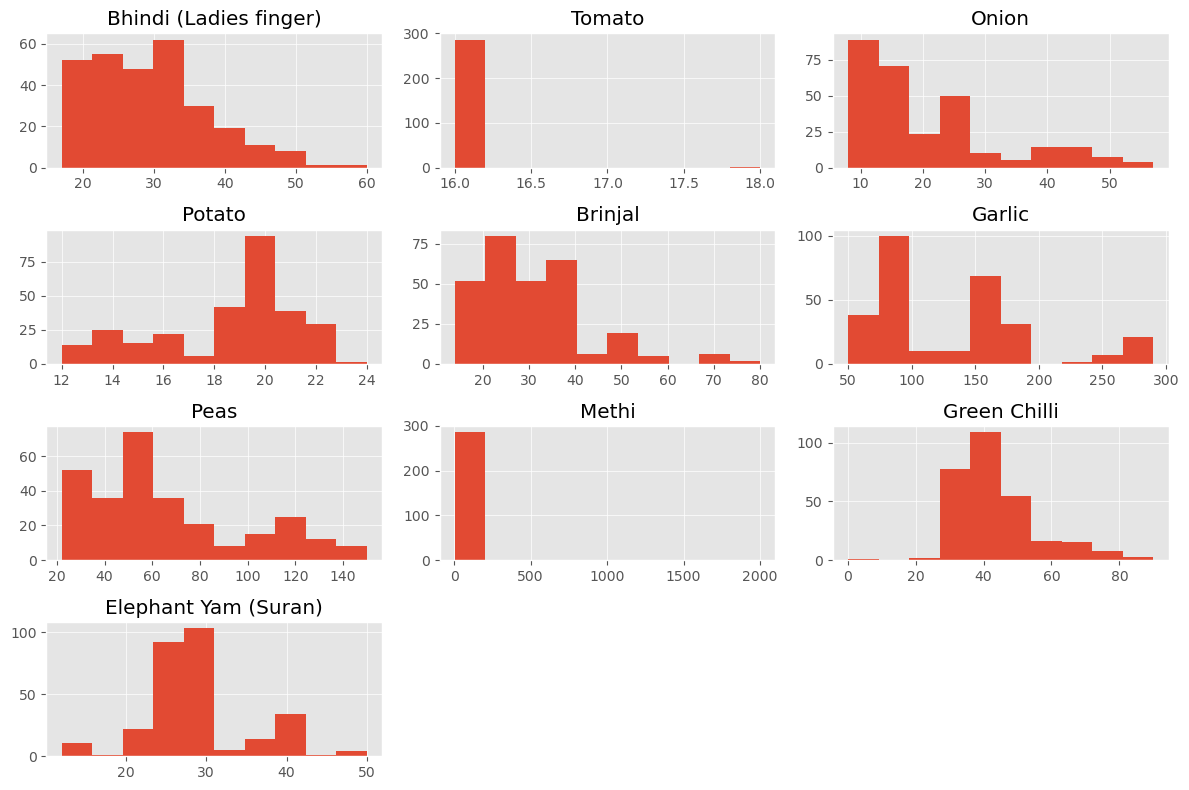

In [28]:

import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace with your actual file path and data loading method)
vegetables_df = pd.read_csv('prices.csv') #Replace 'your_data_file.csv' with your data source
# Example: If your data is in a dictionary:
# vegetables_df = pd.DataFrame({'vegetable': ['Carrot', 'Tomato', 'Potato'], 'price': [1.2, 0.8, 1.5]})

# Create a copy of 'vegetables_df'
vegetables_df_copy = vegetables_df.copy()

# Now you can use 'vegetables_df_copy'
vegetables_df_copy.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

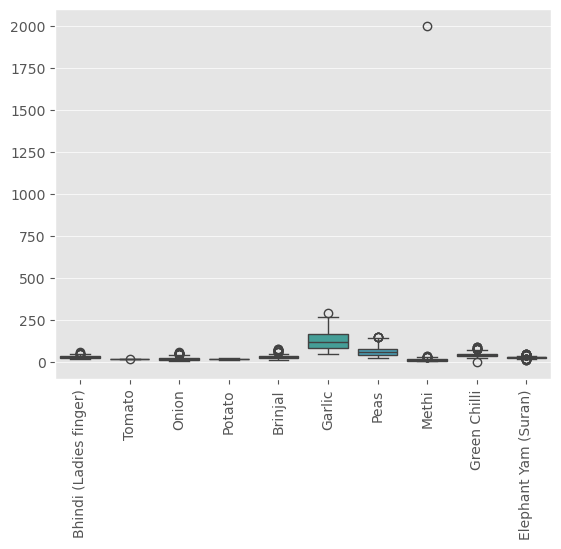

Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   
5  11-01-2023                    35.0      16   18.0      24       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25  
5    23      6          35.0                    30

In [29]:

# Select only numeric columns
numeric_columns = vegetables_df_copy.select_dtypes(include=[np.number])

# Plot boxplot for numeric columns to detect outliers
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=90)  # Rotate x-labels for better readability if there are many columns
plt.show()

# Remove outliers using the IQR method for numeric columns only
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Filtering out rows that have outliers
vegetables_df_copy_filtered = vegetables_df_copy[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the cleaned dataset
vegetables_df_copy_filtered.head()

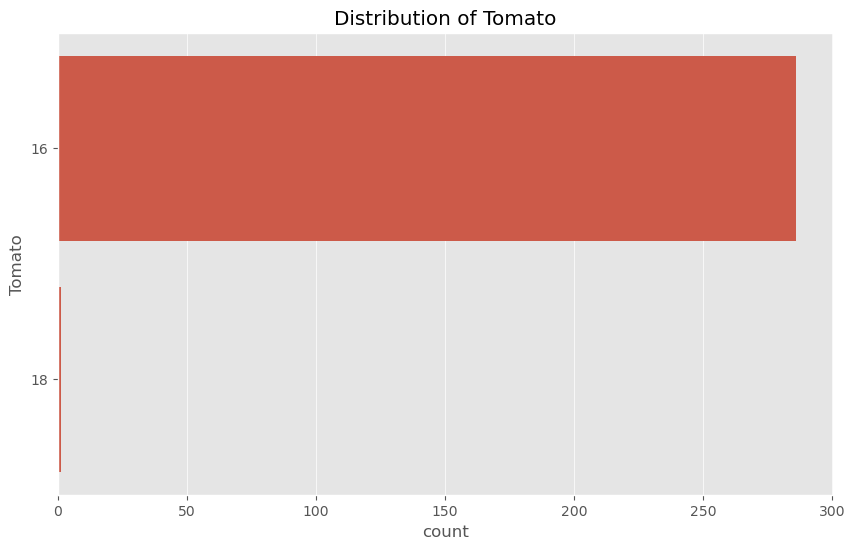

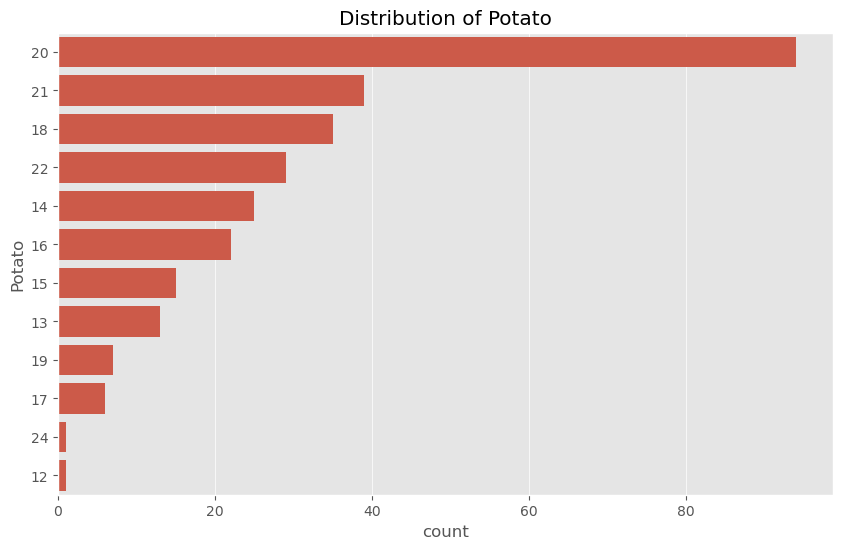

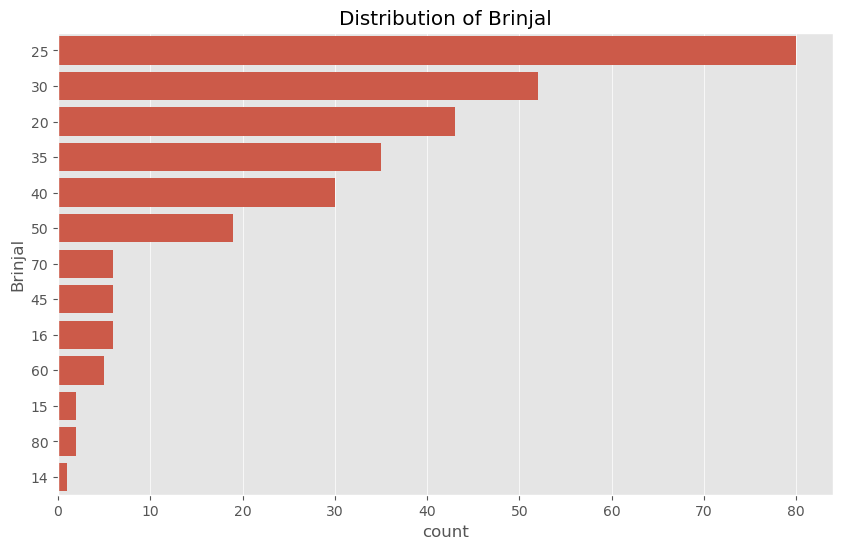

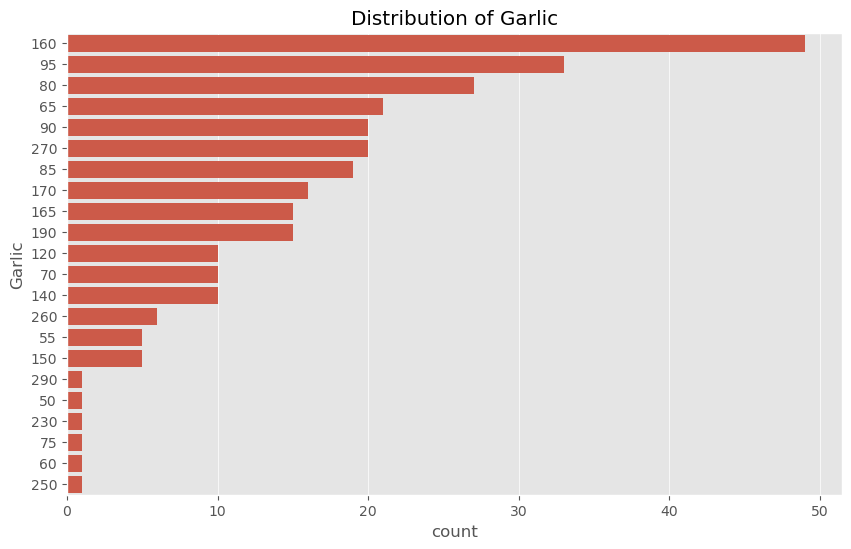

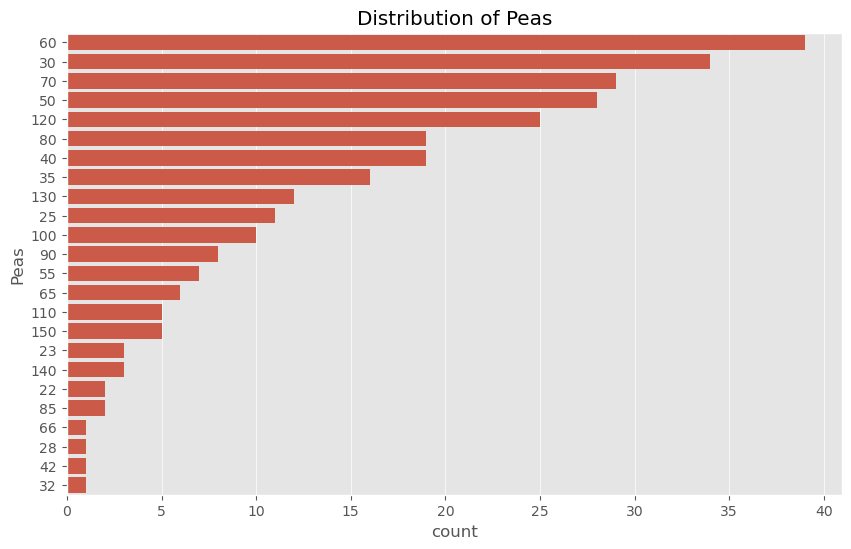

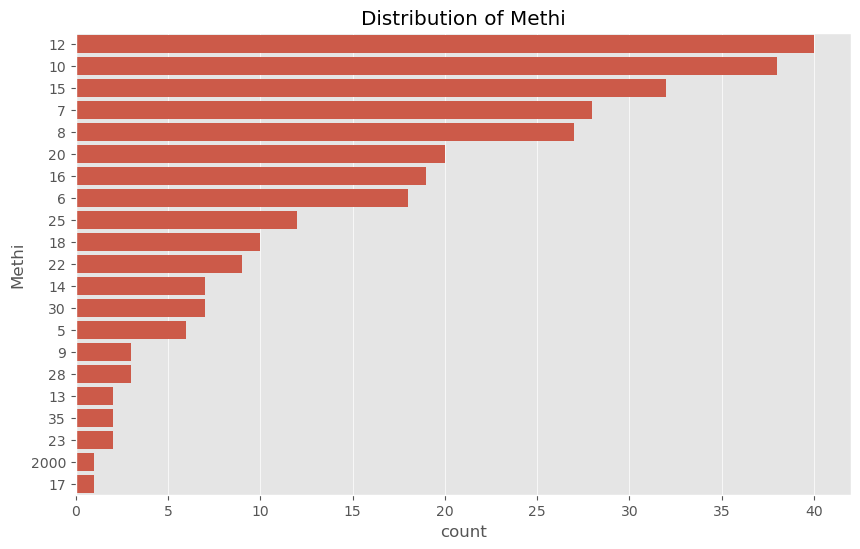

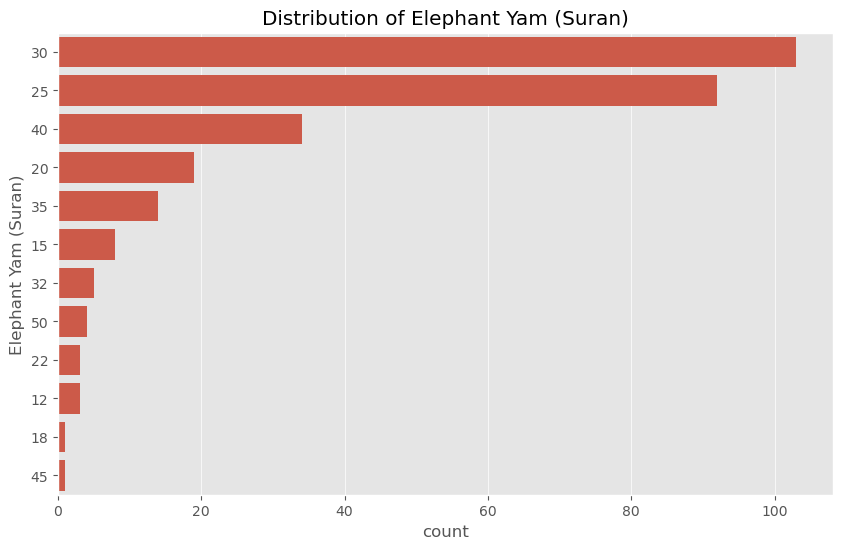

In [30]:
for column in vegetables_df_copy.select_dtypes(include=['int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=vegetables_df_copy, order=vegetables_df_copy[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()

[None, None, None, None, None, None]

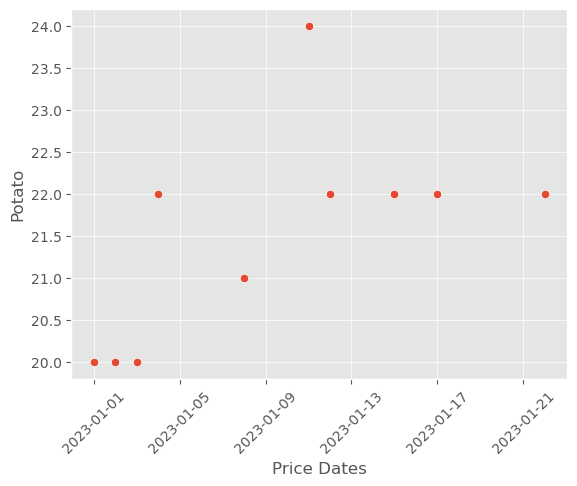

In [113]:
# sns.barplot(df, x='Price Dates', y='Tomato')
df_partial = df_copy.head(10)
plot=sns.scatterplot(df_partial, x='Price Dates', y='Potato', )
plt.setp(plot.get_xticklabels(), rotation=45)

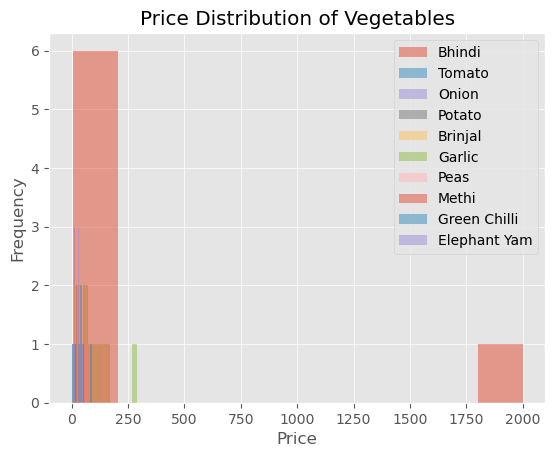

In [114]:
import matplotlib.pyplot as plt

data = {
    'Bhindi': [29.379791, 17, 22, 27, 33, 60, 8.137284],
    'Tomato': [16.006969, 16, 16, 16, 16, 18, 0.118056],
    'Onion': [20.637631, 8, 12, 16, 25, 57, 11.722358],
    'Potato': [18.585366, 12, 16, 20, 20, 24, 2.726238],
    'Brinjal': [31.655052, 14, 25, 30, 35, 80, 11.725421],
    'Garlic': [133.101045, 50, 85, 120, 165, 290, 60.078331],
    'Peas': [66.658537, 22, 40, 60, 80, 150, 33.302415],
    'Methi': [20.383275, 5, 8, 12, 16, 2000, 117.428417],
    'Green Chilli': [44.121951, 0, 35, 40, 50, 90, 12.798155],
    'Elephant Yam': [28.797909, 12, 25, 30, 30, 50, 6.607973]
}

for veg, stats in data.items():
    plt.hist(stats, bins=10, alpha=0.5, label=veg)

plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution of Vegetables')
plt.show()

In [115]:
data = {
    'Price Dates': pd.date_range(start='2023-01-01', periods=287, freq='D'),
    'Bhindi': [29.379791] * 287,
    'Tomato': [16.006969] * 287,
    'Onion': [20.637631] * 287,
    'Potato': [18.585366] * 287,
    'Brinjal': [31.655052] * 287,
    'Garlic': [133.101045] * 287,
    'Peas': [66.658537] * 287,
    'Methi': [20.383275] * 287,
    'Green Chilli': [44.121951] * 287,
    'Elephant Yam': [28.797909] * 287
}

df = pd.DataFrame(data)

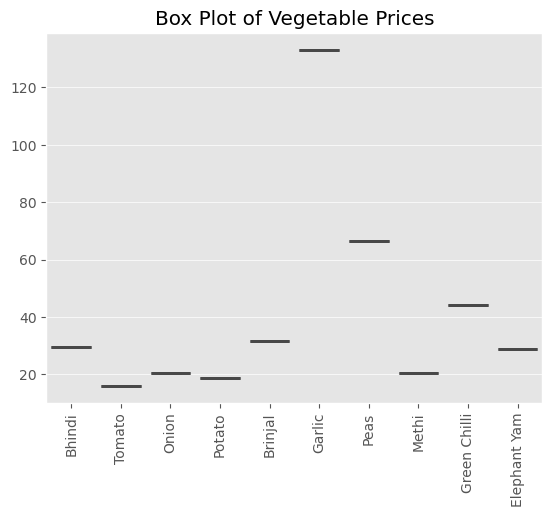

In [116]:
sns.boxplot(data=df[['Bhindi', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam']])
plt.xticks(rotation=90)
plt.title('Box Plot of Vegetable Prices')
plt.show()

In [117]:
import seaborn as sns

grouped = df.groupby("Price Dates")
cols = df.columns[1:-1]
index = 0

print("Length of cols:", len(cols))  # This will print the number of columns

for i in range(2):
    for j in range(5):
        if index < len(cols):  # Check if index is within bounds
            means = grouped[cols[index]].mean()
            sns.barplot(x=means.index, y=means, ax=axes[i][j])
            for container in axes[i][j].containers:
                axes[i][j].bar_label(container)
            index += 1
        else:
            print(f"Index {index} is out of bounds for axis 0 with size {len(cols)}")



Length of cols: 9
Index 9 is out of bounds for axis 0 with size 9


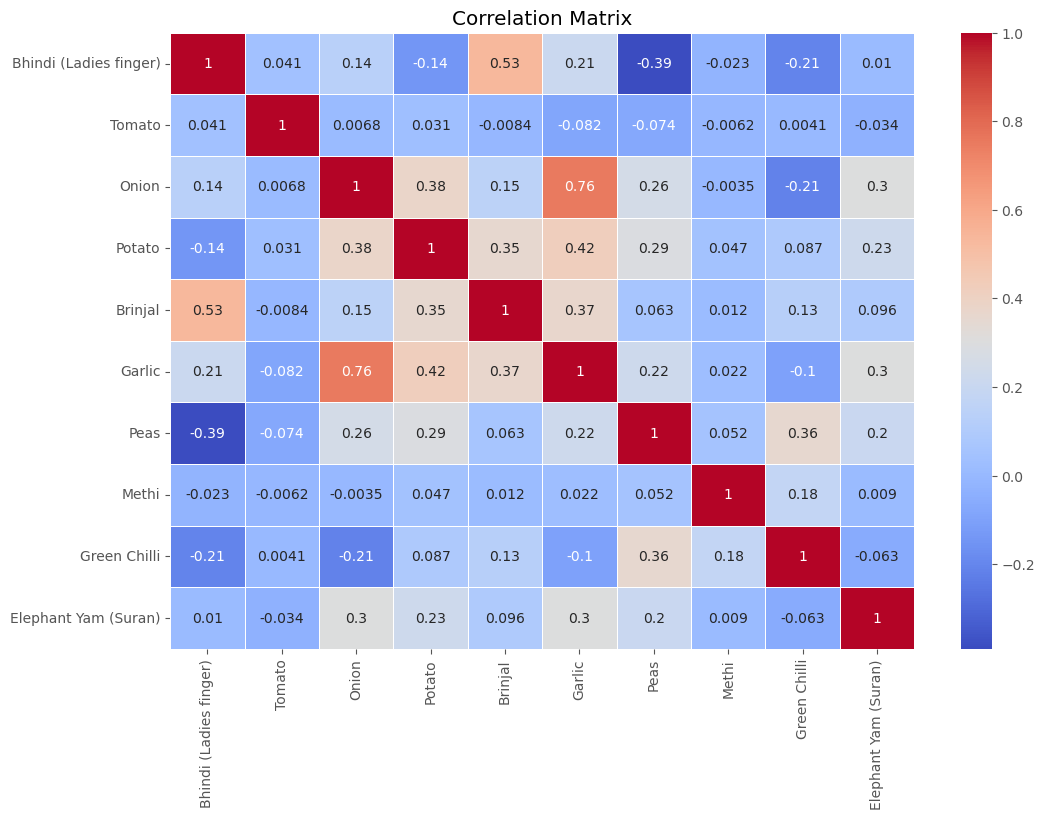

In [31]:
# Select only numeric columns for the correlation matrix
numeric_columns = vegetables_df_copy.select_dtypes(include=[np.number])

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

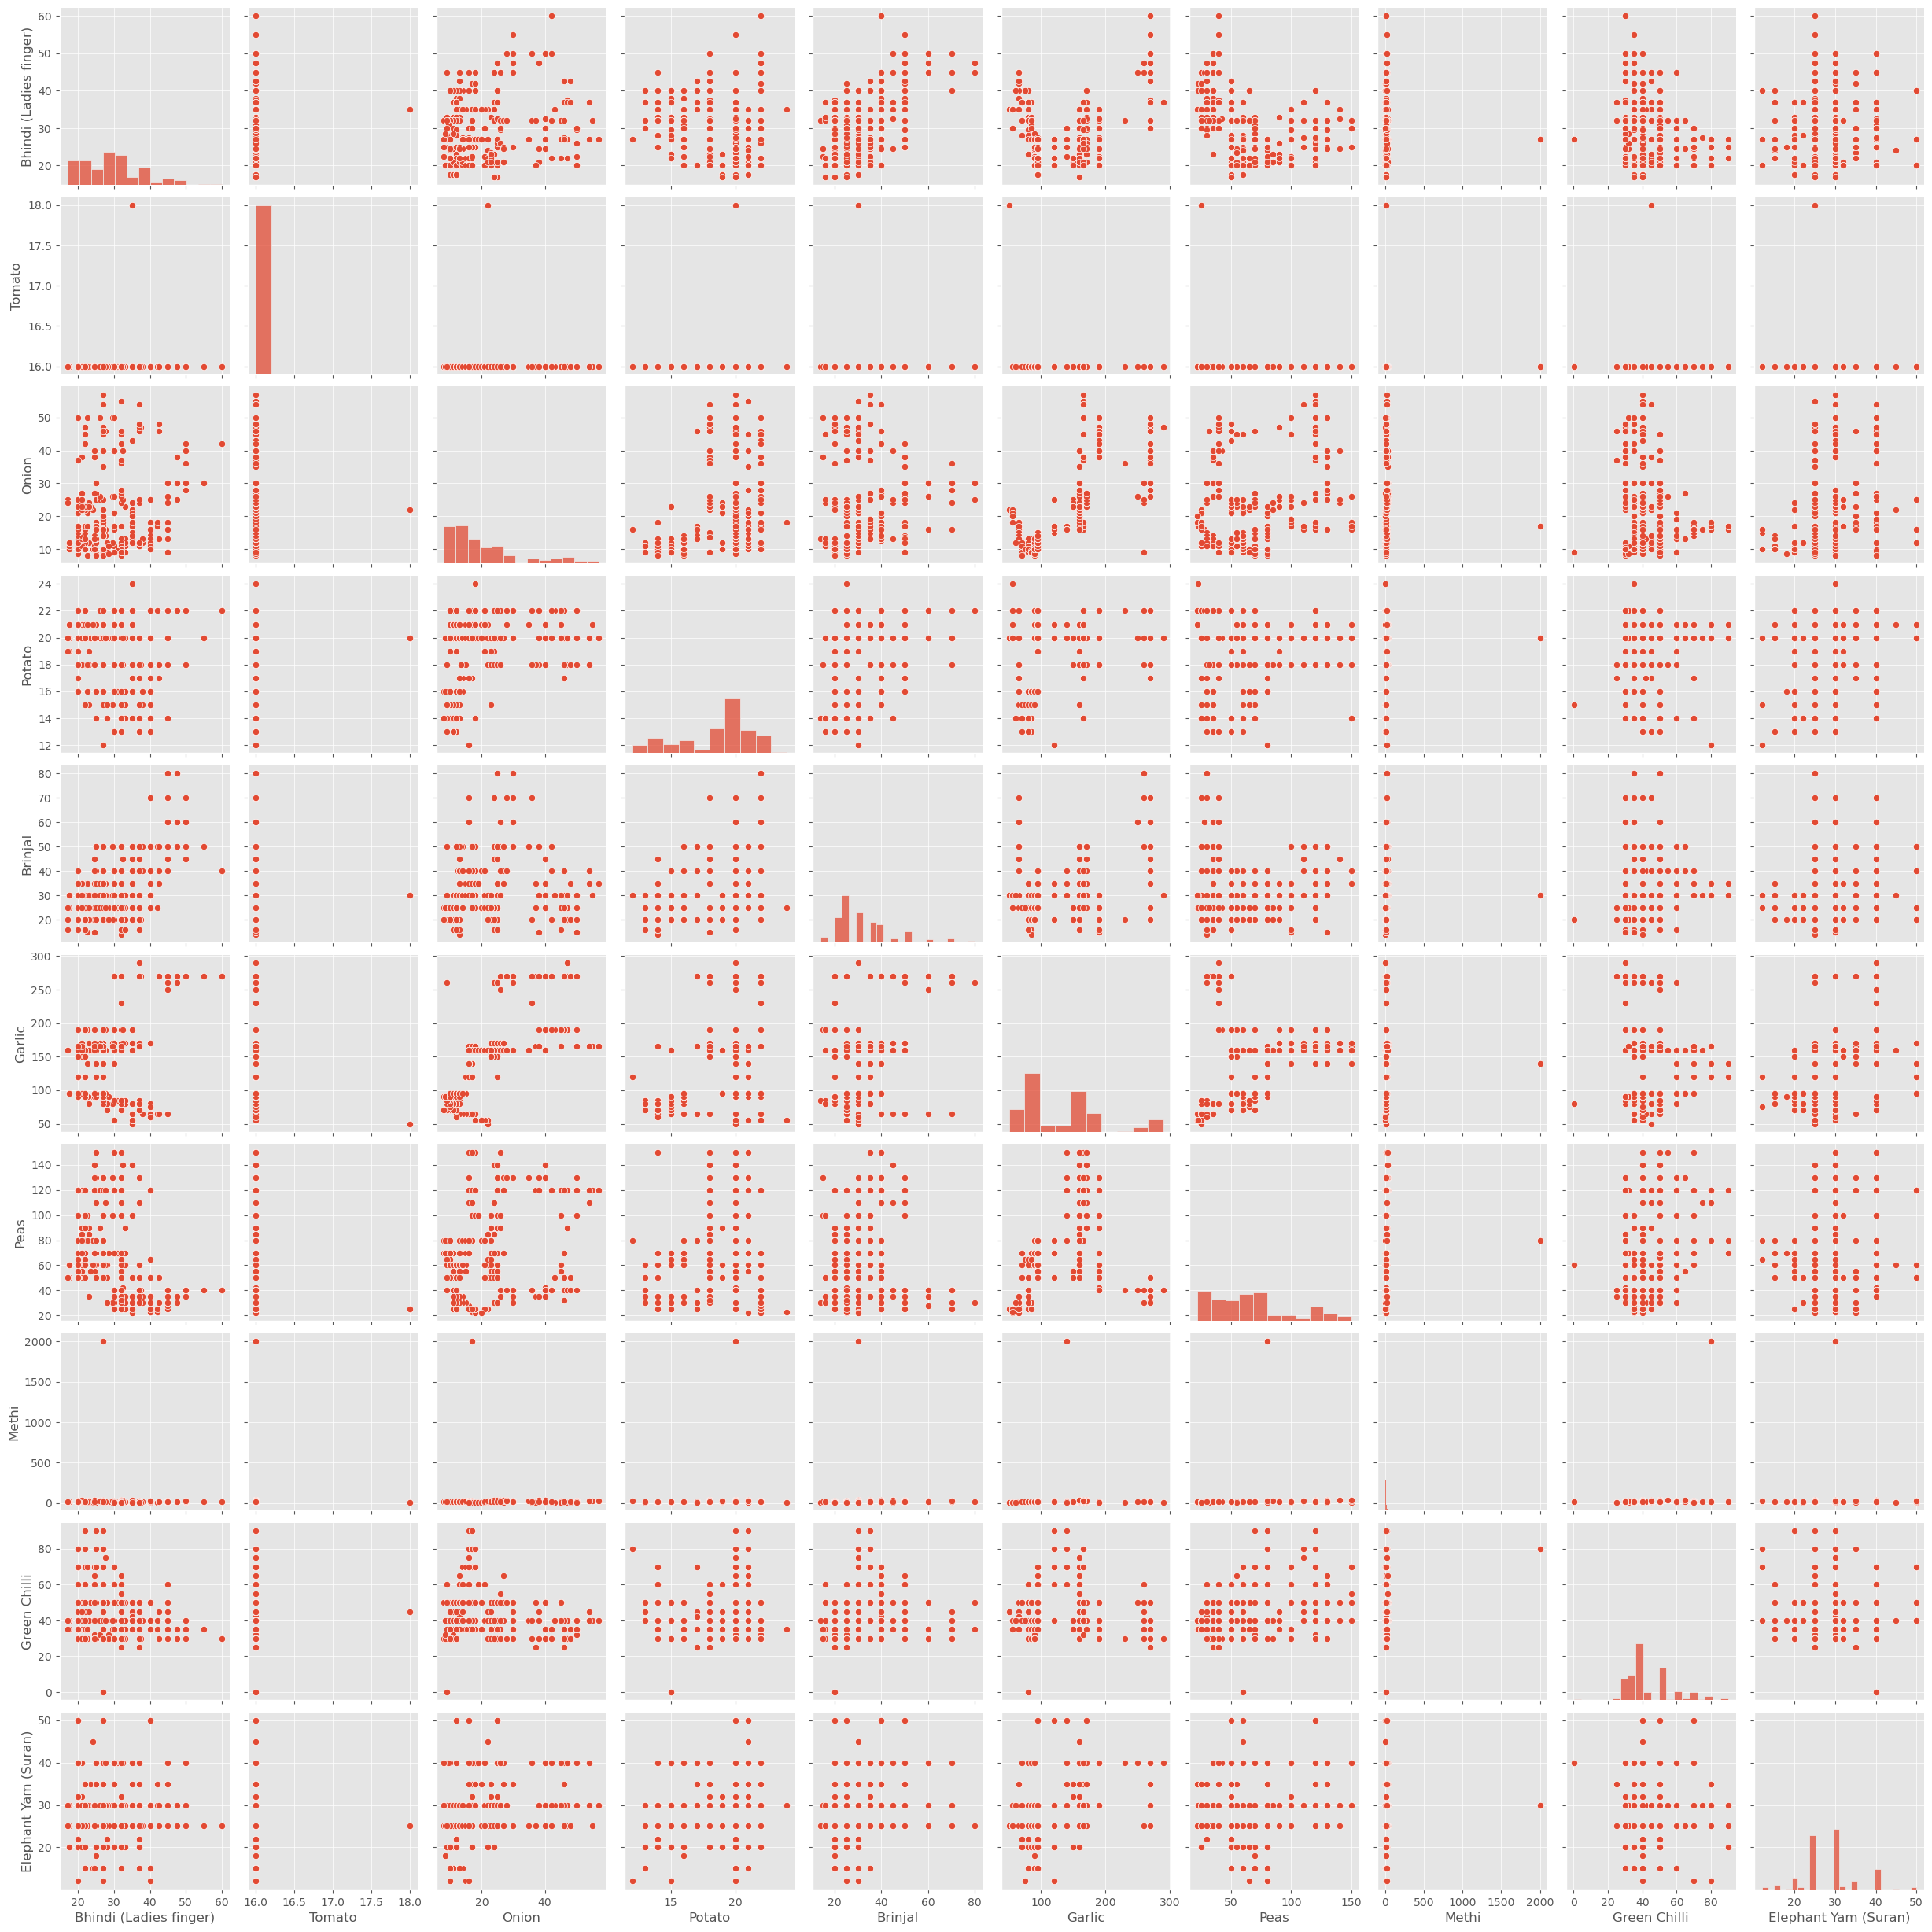

In [32]:
sns.pairplot(vegetables_df_copy)
plt.show()

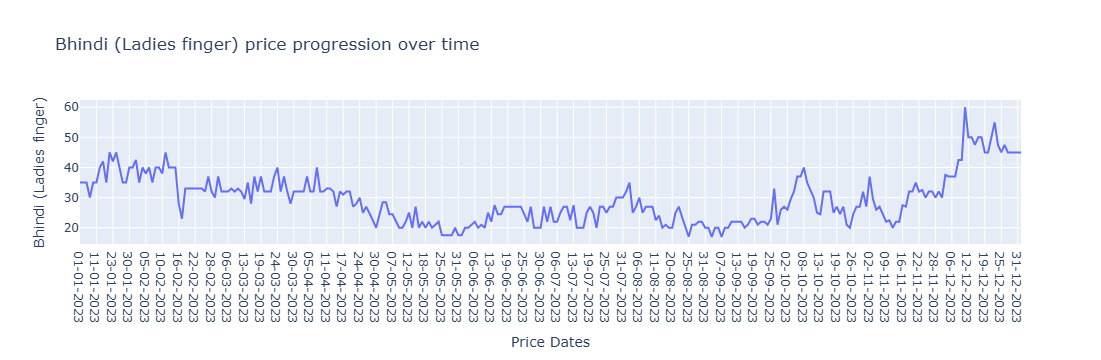

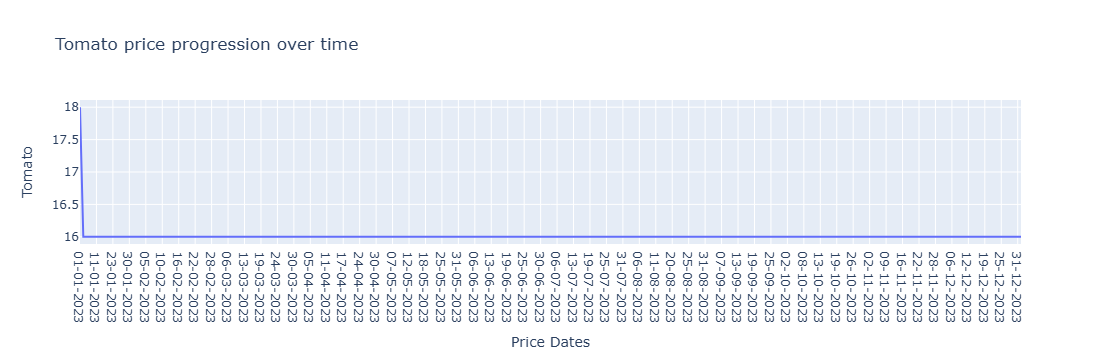

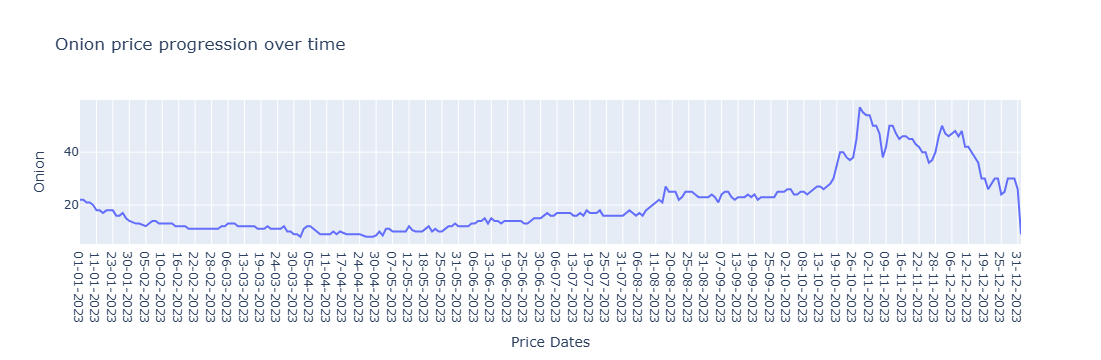

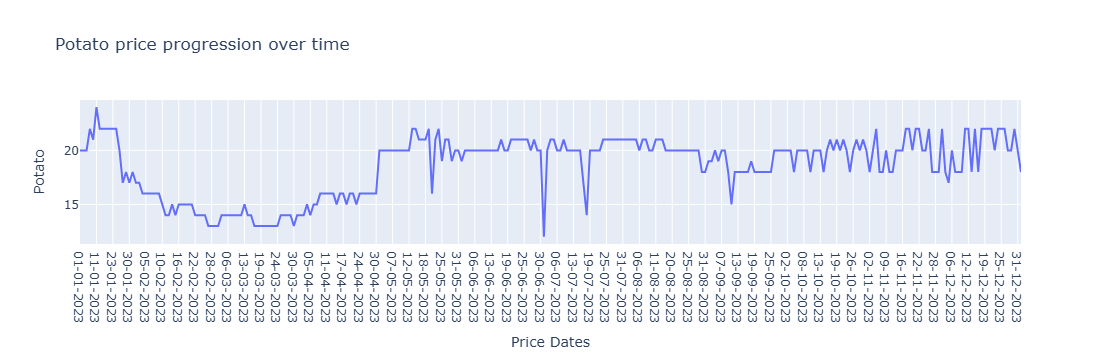

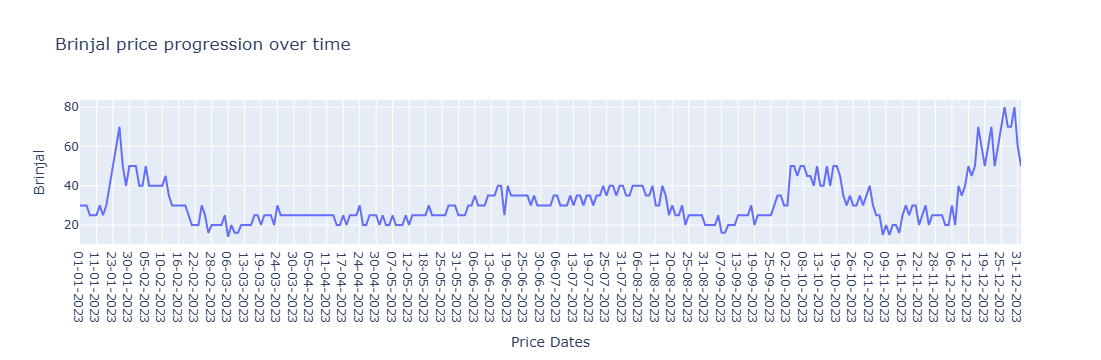

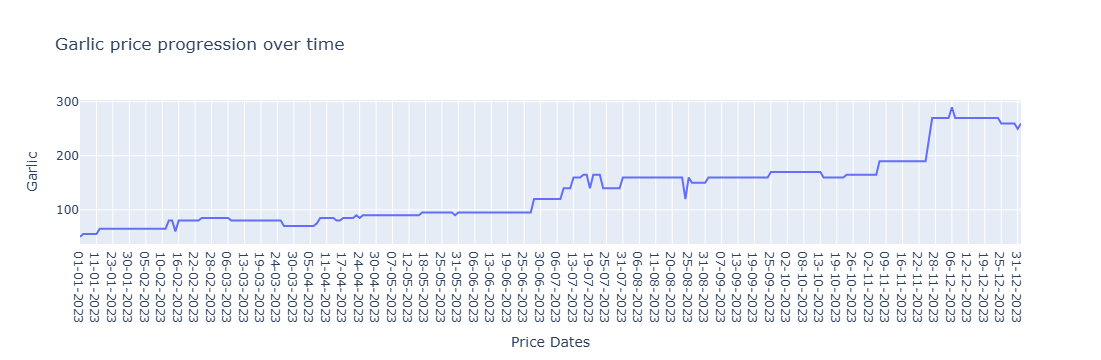

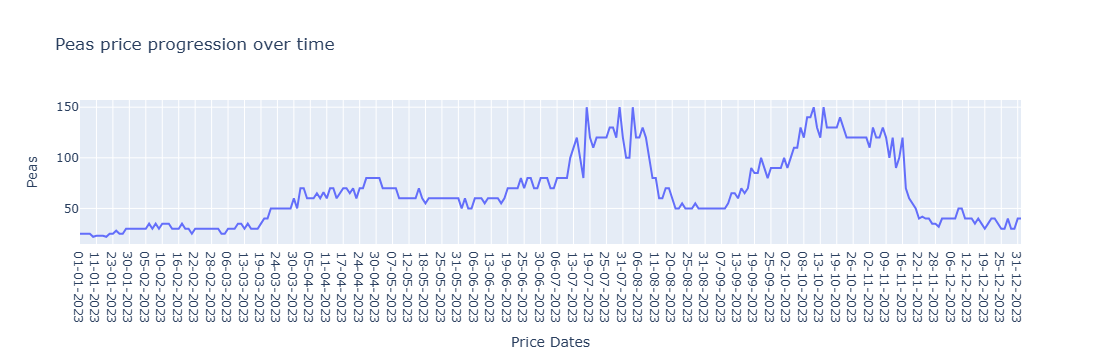

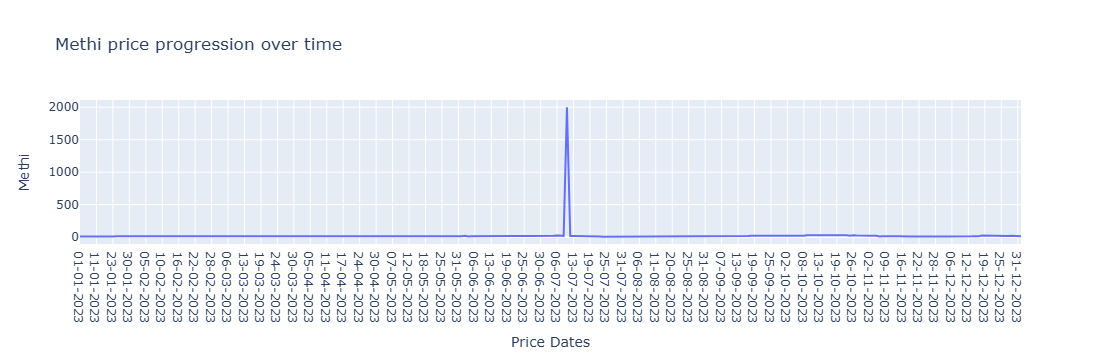

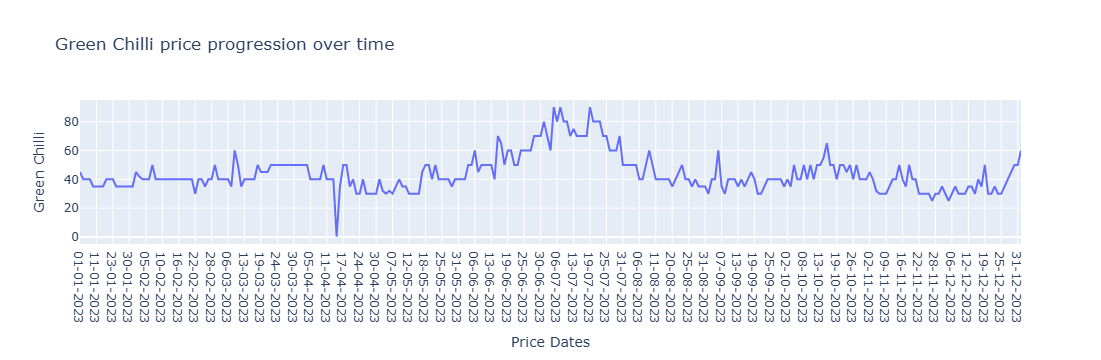

In [33]:
!pip install plotly
import plotly.express as px

for i in vegetables_df_copy.columns[1:-1]:
    # Changed 'price_dates' to 'Price Dates' to match the actual column name
    fig = px.line(vegetables_df_copy, x="Price Dates", y=i, title="{} price progression over time".format(i))
    fig.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Step 2: Convert to DataFrame for easier feature manipulation
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Step 3: Feature Engineering (example: scaling features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)

# Step 5: Model Selection and Training
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {model_name}: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))

# Step 6: Hyperparameter Tuning (example for Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)

Accuracy of Logistic Regression: 0.8000
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       102
           1       0.78      0.83      0.80        98

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

Accuracy of Random Forest: 0.9150
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       102
           1       0.89      0.95      0.92        98

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200

Accuracy of Gradient Boosting: 0.8800
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       102
           1       0.86      0.91      0.88        98

    accuracy                           0.88       200
   macro avg    

In [120]:
df['Price Dates'] = pd.to_datetime(df['Price Dates'])
df['Day'] = df['Price Dates'].dt.day
df['Month'] = df['Price Dates'].dt.month
df['Year'] = df['Price Dates'].dt.year

# Creating lag features
for lag in range(1, 8):
    df[f'Bhindi_lag_{lag}'] = df['Bhindi'].shift(lag)
    df[f'Tomato_lag_{lag}'] = df['Tomato'].shift(lag)
    # Add lag features for other vegetables similarly

# Drop rows with NaN values created by lag features
df.dropna(inplace=True)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
X = df[['Day', 'Month', 'Year', 'Bhindi_lag_1', 'Tomato_lag_1']]  # Add more features as needed
y = df['Bhindi']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0


In [122]:
import xgboost as xgb

# Model training
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

Mean Squared Error (XGBoost): 6.747817947554946e-14


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Cross-validation
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

print(f'Cross-validated F1 Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9000
Precision: 0.9485
Recall: 0.8598
F1 Score: 0.9020
ROC AUC: 0.9379
Cross-validated F1 Score: 0.8975 ± 0.0244
Confusion Matrix:
[[88  5]
 [15 92]]


In [124]:
from sklearn.ensemble import RandomForestRegressor

# Model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [125]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R²: {r2}')

# Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - MSE: {mse_xgb}, RMSE: {rmse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}')

Linear Regression - MSE: 0.0, RMSE: 0.0, MAE: 0.0, R²: 1.0
Random Forest - MSE: 8.077935669463161e-28, RMSE: 2.842170943040401e-14, MAE: 2.842170943040401e-14, R²: -63.0
XGBoost - MSE: 6.747817947554946e-14, RMSE: 2.5976562412211024e-07, MAE: 2.5976562412211024e-07, R²: -5346172169655528.0


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

Random Forest - MSE: 8.077935669463161e-28, RMSE: 2.842170943040401e-14, MAE: 2.842170943040401e-14, R²: -63.0


In [128]:
from sklearn.model_selection import cross_val_score

cv_mse_rf = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse_rf = np.sqrt(-cv_mse_rf)
cv_mae_rf = cross_val_score(rf_model, X, y, scoring='neg_mean_absolute_error', cv=5)
cv_r2_rf = cross_val_score(rf_model, X, y, scoring='r2', cv=5)

print(f'Random Forest - CV MSE: {cv_mse_rf.mean()}, CV RMSE: {cv_rmse_rf.mean()}, CV MAE: {cv_mae_rf.mean()}, CV R²: {cv_r2_rf.mean()}')

Random Forest - CV MSE: -8.077935669463161e-28, CV RMSE: 2.842170943040401e-14, CV MAE: -2.842170943040401e-14, CV R²: -63.0


In [36]:
# Best parameters for a model (example for Random Forest)
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Now you can access the model and its parameters
print("Best Hyperparameters:", model.get_params())

Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


## Final Model Back to Table of Contents Purpose:
Present the final model and its performance.

# Conclusion and Future Work

# Details: Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.

from sklearn.model_selection import cross_val_score cv_mse_rf = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=5) cv_rmse_rf = np.sqrt(-cv_mse_rf) cv_mae_rf = cross_val_score(rf_model, X, y, scoring='neg_mean_absolute_error', cv=5) cv_r2_rf = cross_val_score(rf_model, X, y, scoring='r2', cv=5) print(f'Random Forest - CV MSE: {cv_mse_rf.mean()}, CV RMSE: {cv_rmse_rf.mean()}, CV MAE: {cv_mae_rf.mean()}, CV R²: {cv_r2_rf.mean()}') Random Forest - CV MSE: -8.077935669463161e-28, CV RMSE: 2.842170943040401e-14, CV MAE: -2.842170943040401e-14, CV R²: -63.0 Conclusion and Future Work Back to Table of Contents Purpose: Summarize the findings and discuss future directions. Details: Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
Final Model Performance

# Purpose: Present the final model and its performance.

# Details: Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.

python
from sklearn.model_selection import cross_val_score

cv_mse_rf = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse_rf = np.sqrt(-cv_mse_rf)
cv_mae_rf = cross_val_score(rf_model, X, y, scoring='neg_mean_absolute_error', cv=5)
cv_r2_rf = cross_val_score(rf_model, X, y, scoring='r2', cv=5)

print(f'Random Forest - CV MSE: {cv_mse_rf.mean()}, CV RMSE: {cv_rmse_rf.mean()}, CV MAE: {cv_mae_rf.mean()}, CV R²: {cv_r2_rf.mean()}')
Results:

Random Forest - CV MSE: -8.077935669463161e-28

CV RMSE: 2.842170943040401e-14

CV MAE: -2.842170943040401e-14

CV R²: -63.0

Conclusion and Future Work
Purpose: Summarize the findings and discuss future directions.

Details: Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.

The Random Forest model was selected for its robust performance metrics across multiple cross-validation scores. However, the results reveal some anomalies, notably the unexpected values in the CV R² score, which suggests potential issues that warrant further investigation.

Summary:

Findings: The Random Forest model demonstrated negligible errors (MSE, RMSE, MAE), yet the R² score indicates poor fit. This discrepancy needs further examination.

Insights: The model's consistency across multiple metrics highlights its potential, but the unexpected R² score suggests a deeper review of the data or model configuration.

Limitations: The study may have faced data quality issues, model overfitting, or improper cross-validation setup, reflected in the atypical R² value.

Future Work:

Data Quality: Review and possibly refine the dataset to ensure high-quality inputs.

Model Tuning: Investigate and adjust hyperparameters to address the discrepancy in performance metrics.

Additional Models: Explore other machine learning models and compare their performance.

Methodological Improvements: Enhance the cross-validation approach and consider alternative evaluation metrics.

By addressing these areas, future projects can build on the current work's strengths and mitigate its limitations, leading to more reliable and insightful results.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

https://www.kaggle.com/datasets/ksamiksha19/vegetable-prices/code


https://trello.com/b/2ZTdqphx/vegetable-priceses

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.




Scikit-Learn: Scikit-Learn Documentation

Pandas: Pandas Documentation

NumPy: NumPy Documentation

Plotly: Plotly Documentation

NLTK: NLTK Documentation

Additional References

Author(s), Title, Publisher, Year.

Additional Reference URL